<a href="https://colab.research.google.com/github/AdRavi89/TugasKuliahUSM/blob/main/PRAKTIK_8_AI_UJIAN_PRAKTIKUM_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cara 1 (Perhitungan Mandiri)

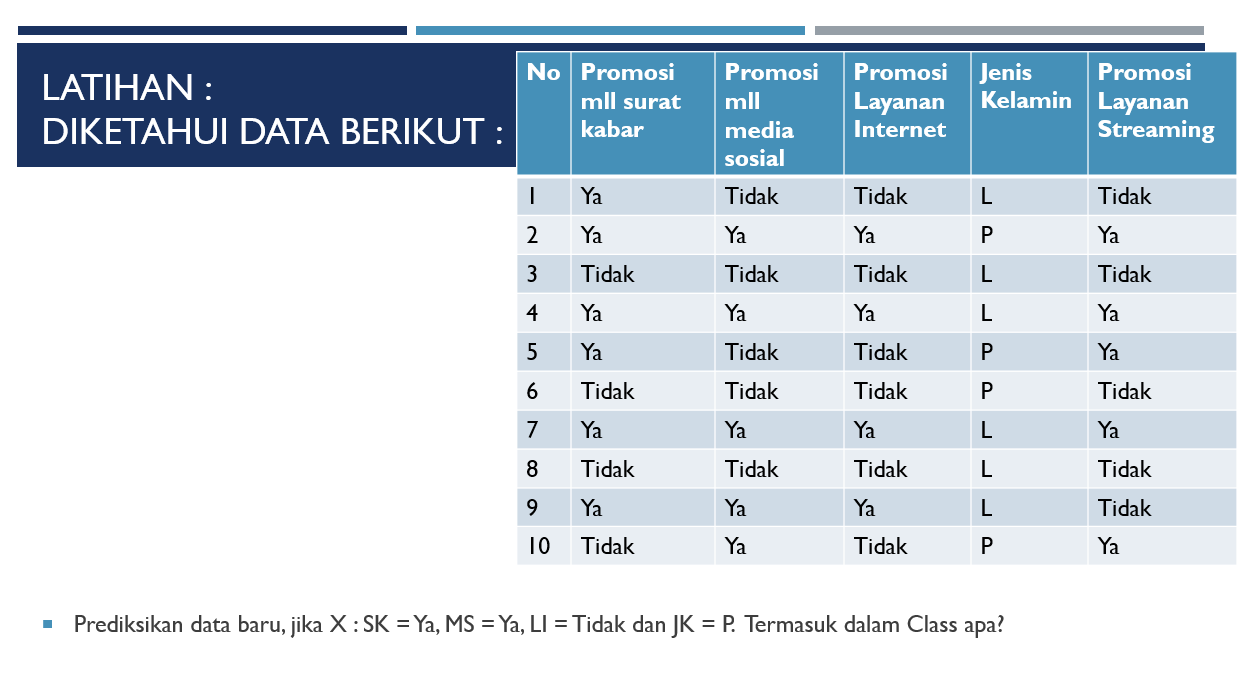

Untuk memprediksi data baru menggunakan teorema Naive Bayes :
Pertama, kita perlu menghitung probabilitas prior masing-masing kelas. Probabilitas prior adalah probabilitas suatu kelas terjadi secara independen dari nilai-nilai atribut lainnya.
Berdasarkan data yang diberikan, terdapat 2 kelas, yaitu "Ya" dan "Tidak". Probabilitas prior masing-masing kelas adalah sebagai berikut:

* P(LayananStreaming=Tidak) = 5/10 = 0.5000
* P(LayananStreaming=Ya) = 5/10 = 0.5000

* P(SuratKabar=Ya|LayananStreaming=Tidak) = 2/5 = 0.4000
* P(SuratKabar=Ya|LayananStreaming=Ya) = 4/5 = 0.8000

* P(MediaSosial=Ya|LayananStreaming=Tidak) = 1/5 = 0.2000
* P(MediaSosial=Ya|LayananStreaming=Ya) = 4/5 = 0.8000

* P(LayananInternet=Tidak|LayananStreaming=Tidak) = 4/5 = 0.8000
* P(LayananInternet=Tidak|LayananStreaming=Ya) = 2/5 = 0.4000

* P(JenisKelamin=P|LayananStreaming=Tidak) = 1/5 = 0.2000
* P(JenisKelamin=P|LayananStreaming=Ya) = 3/5 = 0.6000

Probabilitas Kelas Berdasarkan Fitur Data Baru:
1.	P(LayananStreaming=Tidak∣DataBaru) = P(LayananStreaming=Tidak)×P(SuratKabar=Ya∣LayananStreaming=Tidak)×P(MediaSosial=Ya∣LayananStreaming=Tidak)×P(LayananInternet=Tidak∣LayananStreaming=Tidak)×P(JenisKelamin=P∣LayananStreaming=Tidak)
 = 0.5000×0.4000×0.2000×0.8000×0.2000
=0.0064∝0.5000×0.4000×0.2000×0.8000×0.2000 = **0.0064**

  P(LayananStreaming=Tidak|Data Baru) ∝ 0.0640

2.	P(LayananStreaming=Ya∣DataBaru)= P(LayananStreaming=Ya)×P(SuratKabar=Ya∣LayananStreaming=Ya)×P(MediaSosial=Ya∣LayananStreaming=Ya)×P(LayananInternet=Tidak∣LayananStreaming=Ya)×P(JenisKelamin=P∣LayananStreaming=Ya) =0.5000×0.8000×0.8000×0.4000×0.6000
=0.0768∝0.5000×0.8000×0.8000×0.4000×0.6000 = **0.0768**

  P(LayananStreaming=Ya|Data Baru) ∝ 0.7680


Karena probabilitas posterior kelas "Ya" lebih besar daripada probabilitas posterior kelas "Tidak", maka data baru dengan nilai-nilai atribut Surat Kabar=Ya, Media Sosial=Ya, Layanan Internet=Tidak, dan Jenis Kelamin=P akan diprediksi masuk ke dalam kelas "Ya".
Jadi, jawabannya adalah Ya.


In [ ]:
from collections import Counter
import pandas as pd

# Data training
data = pd.DataFrame({
    'SuratKabar': ['Ya', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak'],
    'MediaSosial': ['Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Ya'],
    'LayananInternet': ['Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak'],
    'JenisKelamin': ['L', 'P', 'L', 'L', 'P', 'P', 'L', 'L', 'L', 'P'],
    'LayananStreaming': ['Tidak', 'Ya', 'Tidak', 'Ya', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Tidak', 'Ya']
})

# Data baru (X)
new_data = {
    'SuratKabar': 'Ya',
    'MediaSosial': 'Ya',
    'LayananInternet': 'Tidak',
    'JenisKelamin': 'P'
}

# 1. Menghitung Probabilitas Kelas
class_probabilities = dict(Counter(data['LayananStreaming']))
total_data = len(data)
print("Probabilitas Kelas:")
print("="*20)
for cls, count in class_probabilities.items():
    prob = count / total_data
    print(f"P(LayananStreaming={cls}) = {count}/{total_data} = {prob:.4f}")
    print("="*20)

# 2. Menghitung Probabilitas Fitur untuk Setiap Kelas
conditional_probabilities = {}
for feature in new_data:
    for cls in class_probabilities:
        subset = data[data['LayananStreaming'] == cls][feature]
        feature_count = subset[subset == new_data[feature]].count()
        class_count = class_probabilities[cls]
        probability = feature_count / class_count
        key = f"P({feature}={new_data[feature]}|LayananStreaming={cls})"
        conditional_probabilities[key] = probability
        print(f"{key} = {feature_count}/{class_count} = {probability:.4f}")
        print("="*20)

# 3. Menghitung Probabilitas Kelas Berdasarkan Fitur Data Baru
class_probabilities_given_feature = {}
print("\nProbabilitas Kelas Berdasarkan Fitur Data Baru:")
print("="*20)
for cls in class_probabilities:
    probability = class_probabilities[cls]
    for feature in new_data:
        key = f"P({feature}={new_data[feature]}|LayananStreaming={cls})"
        probability *= conditional_probabilities[key]
    class_probabilities_given_feature[cls] = probability
    print(f"P(LayananStreaming={cls}|Data Baru) ∝ {probability:.4f}")
    print("="*20)
# Mencari kelas dengan probabilitas tertinggi
predicted_class = max(class_probabilities_given_feature, key=class_probabilities_given_feature.get)

print(f"\nData baru termasuk dalam kelas: {predicted_class}")


Probabilitas Kelas:
P(LayananStreaming=Tidak) = 5/10 = 0.5000
P(LayananStreaming=Ya) = 5/10 = 0.5000
P(SuratKabar=Ya|LayananStreaming=Tidak) = 2/5 = 0.4000
P(SuratKabar=Ya|LayananStreaming=Ya) = 4/5 = 0.8000
P(MediaSosial=Ya|LayananStreaming=Tidak) = 1/5 = 0.2000
P(MediaSosial=Ya|LayananStreaming=Ya) = 4/5 = 0.8000
P(LayananInternet=Tidak|LayananStreaming=Tidak) = 4/5 = 0.8000
P(LayananInternet=Tidak|LayananStreaming=Ya) = 2/5 = 0.4000
P(JenisKelamin=P|LayananStreaming=Tidak) = 1/5 = 0.2000
P(JenisKelamin=P|LayananStreaming=Ya) = 3/5 = 0.6000

Probabilitas Kelas Berdasarkan Fitur Data Baru:
P(LayananStreaming=Tidak|Data Baru) ∝ 0.0640
P(LayananStreaming=Ya|Data Baru) ∝ 0.7680

Data baru termasuk dalam kelas: Ya


# Cara Ke 2 (Sesuai Materi Praktikum)

In [ ]:
# Memanggil library
import pandas as pd
import numpy as np

# Membaca data Promosi
mhs = pd.read_excel('Data Promosi.xlsx')
mhs.head(10)

# Membuat atribut reguler
x = mhs.drop(['LayananStreaming'], axis=1)
x.head()

# Membuat atribut target/class
y = mhs['LayananStreaming']
y.head()

# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Memanggil fungsi Gaussian Naive Bayes
nbc = GaussianNB()

# Memasukkan data training ke dalam fungsi klasifikasi naive bayes
data_training = nbc.fit(x.values, y)
data_training

# Melakukan prediksi pada data training
y_predict = data_training.predict(x.values)
print(y_predict)

# Melakukan prediksi pada data input --> data yang akan diprediksi
SuratKabar = 1  # 1 = Ya
MediaSosial = 1  # 1 = Ya
LayananInternet = 0  # 0 = Tidak
JenisKelamin = 0  # 0 = Perempuan
LayananStreaming = 0 # 0 = tidak
Data_testing1 = [[SuratKabar, MediaSosial, LayananInternet, JenisKelamin]]
Data_testing1

# Melakukan prediksi pada data input --> data yang akan diprediksi
SuratKabar = 1  # 1 = Ya
MediaSosial = 1  # 1 = Ya
LayananInternet = 0  # 0 = Tidak
JenisKelamin = 0  # 0 = Perempuan
LayananStreaming = 1 # 1 = ya
Data_testing2 = [[SuratKabar, MediaSosial, LayananInternet, JenisKelamin]]
Data_testing2

# Melakukan prediksi berdasarkan data input
y_pred1 = data_training.predict(Data_testing1)
y_pred1

# Mencetak hasil prediksi masuk kelas
# hasil 0 = Tidak, 1 = Ya
if y_pred1 == 0:
    hasil = 'Tidak'
elif y_pred1 == 1:
    hasil = 'Ya'
else:
    hasil = 'Error'
print('Hasil Prediksi Masuk Kelas : ', hasil)

y_pred1

y_pred2 = data_training.predict(Data_testing2)
y_pred2

# Mencetak hasil prediksi masuk kelas
# hasil 0 = Tidak, 1 = Ya
if y_pred2 == 0:
    hasil = 'Tidak'
elif y_pred2 == 1:
    hasil = 'Ya'
else:
    hasil = 'Error'
print('Hasil Prediksi Masuk Kelas : ', hasil)

# Menghitung akurasi --> melihat skor akurasi
from sklearn.metrics import accuracy_score
print('Nilai akurasi = %0.2f' % accuracy_score(y, y_predict))

# Mencetak laporan hasil klasifikasi
from sklearn.metrics import classification_report
print(classification_report(y, y_predict))


[0 1 0 1 0 0 1 0 1 1]
Hasil Prediksi Masuk Kelas :  Ya
Hasil Prediksi Masuk Kelas :  Ya
Nilai akurasi = 0.80
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

